# This notebook does three things: 
1) Runs DESeq2 on the nine comparisons of interest: 

```
- 7 Day, Radiation vs Control
- 7 Day, Unloaded vs Control
- 7 Day, Combination vs Control
- 1 Month, Radiation vs Control
- 1 Month, Unloaded vs Control
- 1 Month, Combination vs Control
- 4 Month, Radiation vs Control
- 4 Month, Unloaded vs Control
- 4 Month, Combination vs Control
```

2)  Saves the dds objects from DESeq2

3)  Plots the p-value distributions

### Data Analysis Pipeline Adapted from: http://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#countmat

### Overview of P-Value Distributions: http://varianceexplained.org/statistics/interpreting-pvalue-histogram/


In [1]:
# Load Unnormalized Read Counts
unnormalized_counts = "../GLDS-202_Unnormalized_Counts.txt"
cts <- as.matrix(read.table(unnormalized_counts, sep="\t", row.names="GeneID", header=TRUE))

In [2]:
# View Rawdata
head(cts)

,CFG2006,CFG2007,CFG2008,CFG2009,CFG2010,CFG2011,CFG2012,CFG2013,CFG2014,CFG2015,⋯,CFG2095,CFG2096,CFG2097,CFG2098,CFG2099,CFG2100,CFG2101,CFG2102,CFG2103,CFG2104
ENSMUSG00000000001.4,276,277,295,267,292,325,377,274,303,258,⋯,287.00,408,300,265,340,229,331.00,360,417,269
ENSMUSG00000000003.15,0,0,0,0,0,0,0,0,0,0,⋯,0.00,0,0,0,0,0,0.00,0,0,0
ENSMUSG00000000028.15,9,17,11,13,8,13,15,15,18,7,⋯,33.18,42,39,35,35,22,57.07,34,68,49
ENSMUSG00000000031.16,19,4,24,2,1,8,39,2,11,1,⋯,5.00,2,2,1,3,6,4.00,436,0,0
ENSMUSG00000000037.16,15,12,15,7,18,11,34,26,14,13,⋯,25.00,39,18,41,36,21,28.00,33,35,46
ENSMUSG00000000049.11,0,0,5,1,1,3,3,2,1,0,⋯,2.00,1,0,5,0,0,1.00,3,0,0


In [3]:
# Load Annotations
annotations = "../GLDS-202_203/GLDS-202_SampleTable.csv"
coldata <- read.csv(annotations, row.names=1)

In [4]:
# Retrieve only Retina data
coldata = coldata[coldata$Material %in% "Retina", ]

In [5]:
# View Annotations
coldata

,Radiation,Unloading,Material,Time
CFG2046,0.4gray,Loaded,Retina,7day
CFG2047,0gray,Loaded,Retina,7day
CFG2048,0.4gray,Unloaded,Retina,7day
CFG2049,0gray,Unloaded,Retina,7day
CFG2050,0.4gray,Loaded,Retina,7day
CFG2051,0gray,Unloaded,Retina,7day
CFG2052,0.4gray,Unloaded,Retina,7day
CFG2053,0gray,Unloaded,Retina,7day
CFG2054,0.4gray,Unloaded,Retina,7day
CFG2055,0gray,Loaded,Retina,7day


In [6]:
# Retina Counts Only
retina_cts = cts[ , (colnames(cts) %in% c(rownames(coldata)))]

# DESeq2 requires integers
retina_cts = round(retina_cts)

In [7]:
# Confirm there are only retina columns
head(retina_cts)

,CFG2046,CFG2047,CFG2048,CFG2049,CFG2050,CFG2051,CFG2052,CFG2053,CFG2054,CFG2055,⋯,CFG2095,CFG2096,CFG2097,CFG2098,CFG2099,CFG2100,CFG2101,CFG2102,CFG2103,CFG2104
ENSMUSG00000000001.4,296,339,253,229,234,262,244,244,256,298,⋯,287,408,300,265,340,229,331,360,417,269
ENSMUSG00000000003.15,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028.15,30,46,26,35,32,17,30,46,38,37,⋯,33,42,39,35,35,22,57,34,68,49
ENSMUSG00000000031.16,8,4,3,3,3,1,3,4,0,0,⋯,5,2,2,1,3,6,4,436,0,0
ENSMUSG00000000037.16,30,43,28,18,19,23,20,26,22,37,⋯,25,39,18,41,36,21,28,33,35,46
ENSMUSG00000000049.11,0,1,2,0,0,2,1,2,0,0,⋯,2,1,0,5,0,0,1,3,0,0


In [8]:
# Confirm that coldata and retina counts are ordered the same
all(rownames(coldata) == colnames(retina_cts))

[1] TRUE

In [9]:
##### Filter colnames for all comparisons #####

### Time = 7 Days ###
timepoint = "7day"

# Condition = Radiation and Control
retina_7day_radiation_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0.4gray" & Unloading == "Loaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Unloaded and Control
retina_7day_unloaded_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0gray" & Unloading == "Unloaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Combination and Control
retina_7day_combination_colnames =  subset(coldata,
                                            (Time == timepoint & Radiation == "0.4gray" & Unloading == "Unloaded")
                                            | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))



### Time = 1 Month ###
timepoint = "1month"

# Condition = Radiation and Control
retina_1month_radiation_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0.4gray" & Unloading == "Loaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Unloaded and Control
retina_1month_unloaded_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0gray" & Unloading == "Unloaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Combination and Control
retina_1month_combination_colnames =  subset(coldata,
                                            (Time == timepoint & Radiation == "0.4gray" & Unloading == "Unloaded")
                                            | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))


### Time = 4 Month ###
timepoint = "4month"

# Condition = Radiation and Control
retina_4month_radiation_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0.4gray" & Unloading == "Loaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Unloaded and Control
retina_4month_unloaded_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0gray" & Unloading == "Unloaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Combination and Control
retina_4month_combination_colnames =  subset(coldata,
                                            (Time == timepoint & Radiation == "0.4gray" & Unloading == "Unloaded")
                                            | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

In [10]:
##### Filter counts for all comparisons #####

retina_7day_radiation_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_7day_radiation_colnames)))]
retina_7day_unloaded_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_7day_unloaded_colnames)))]
retina_7day_combination_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_7day_combination_colnames)))]

retina_1month_radiation_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_1month_radiation_colnames)))]
retina_1month_unloaded_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_1month_unloaded_colnames)))]
retina_1month_combination_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_1month_combination_colnames)))]

retina_4month_radiation_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_4month_radiation_colnames)))]
retina_4month_unloaded_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_4month_unloaded_colnames)))]
retina_4month_combination_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_4month_combination_colnames)))]

In [11]:
# Verify that annotations and counts are in the same order (DESeq2 requirement)

# 7day timepoint
all(rownames(retina_7day_radiation_colnames) == colnames(retina_7day_radiation_cts))
all(rownames(retina_7day_unloaded_colnames) == colnames(retina_7day_unloaded_cts))
all(rownames(retina_7day_combination_colnames) == colnames(retina_7day_combination_cts))

# 1month timepoint
all(rownames(retina_1month_radiation_colnames) == colnames(retina_1month_radiation_cts))
all(rownames(retina_1month_unloaded_colnames) == colnames(retina_1month_unloaded_cts))
all(rownames(retina_1month_combination_colnames) == colnames(retina_1month_combination_cts))

# 1month timepoint
all(rownames(retina_4month_radiation_colnames) == colnames(retina_4month_radiation_cts))
all(rownames(retina_4month_unloaded_colnames) == colnames(retina_4month_unloaded_cts))
all(rownames(retina_4month_combination_colnames) == colnames(retina_4month_combination_cts))

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [12]:
run_DESeq2 <- function(counts, labels, comparison, timepoint)
{    
    # Organize data into DESeq2 compatible object
    if (comparison == "radiation" || comparison == "combination")
    {
        dds <- DESeqDataSetFromMatrix(countData = counts,
                                  colData = labels,
                                  design = ~ Radiation)
    }
    else if (comparison == "unloaded")
    {
        dds <- DESeqDataSetFromMatrix(countData = counts,
                                  colData = labels,
                                  design = ~ Unloading)            
    }
    else
    {
        print ("Unrecognized Comparison Argument.")
        return ()
    }
    
    # Prefilter to speed up computation and reduce size of dds
    keep <- rowSums(counts(dds)) >= 10
    dds <- dds[keep,]
    
    # Run DESeq2
    dds <- DESeq(dds)
    
    # Save Results for Future Analysis
    save_name = paste("../R_objects/", "retina_", timepoint, "_", comparison, "Vcontrol_dds.RData", sep="")
    save(dds, file=save_name)
    
    # Return Results for Histogram Plotting
    res <- results(dds)
    return (res)
}

In [13]:
library("DESeq2")

res_7day_radiation = run_DESeq2(retina_7day_radiation_cts, retina_7day_radiation_colnames, "radiation", "7day")
res_7day_unloaded = run_DESeq2(retina_7day_unloaded_cts, retina_7day_unloaded_colnames, "unloaded", "7day")
res_7day_combination = run_DESeq2(retina_7day_combination_cts, retina_7day_combination_colnames, "combination", "7day")

res_1month_radiation = run_DESeq2(retina_1month_radiation_cts, retina_1month_radiation_colnames, "radiation", "1month")
res_1month_unloaded = run_DESeq2(retina_1month_unloaded_cts, retina_1month_unloaded_colnames, "unloaded", "1month")
res_1month_combination = run_DESeq2(retina_1month_combination_cts, retina_1month_combination_colnames, "combination", "1month")

res_4month_radiation = run_DESeq2(retina_4month_radiation_cts, retina_4month_radiation_colnames, "radiation", "4month")
res_4month_unloaded = run_DESeq2(retina_4month_unloaded_cts, retina_4month_unloaded_colnames, "unloaded", "4month")
res_4month_combination = run_DESeq2(retina_4month_combination_cts, retina_4month_combination_colnames, "combination", "4month")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

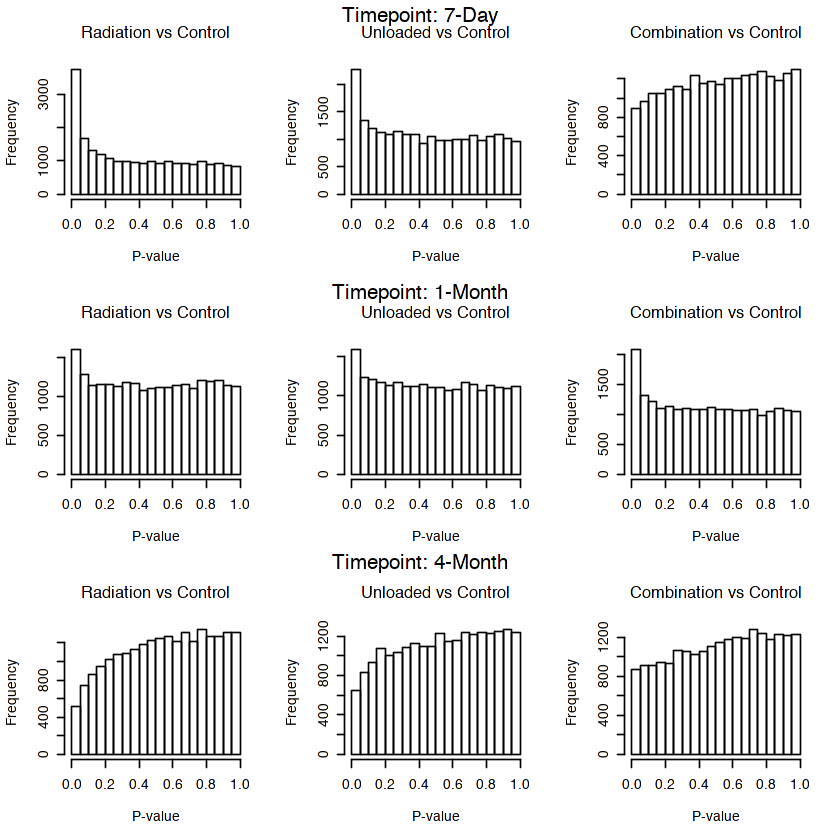

In [14]:
# Plot P-value Distributions for Each Comparison
par(mfrow=c(3,3))

hist(res_7day_radiation$pvalue, main="Radiation vs Control", xlab="P-value")
hist(res_7day_unloaded$pvalue, main="Unloaded vs Control", xlab="P-value")
hist(res_7day_combination$pvalue, main="Combination vs Control", xlab="P-value")

hist(res_1month_radiation$pvalue, main="Radiation vs Control", xlab="P-value")
hist(res_1month_unloaded$pvalue, main="Unloaded vs Control", xlab="P-value")
hist(res_1month_combination$pvalue, main="Combination vs Control", xlab="P-value")

hist(res_4month_radiation$pvalue, main="Radiation vs Control", xlab="P-value")
hist(res_4month_unloaded$pvalue, main="Unloaded vs Control", xlab="P-value")
hist(res_4month_combination$pvalue, main="Combination vs Control", xlab="P-value")

mtext("Timepoint: 7-Day", side = 3, line = -1.5, outer = TRUE)
mtext("Timepoint: 1-Month", side = 3, line = -19, outer = TRUE)
mtext("Timepoint: 4-Month", side = 3, line = -36, outer = TRUE)
